<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/Dimensionality%20Reduction%20HPT%20Randomized%20Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Dimensionality Reduction in Machine Learning**

### **Import Libraries**

In [114]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Ensemble Method
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

### **Load the data**

In [115]:
data = pd.read_csv("Diabetes Multi-Class.csv", sep=';', on_bad_lines='skip')

In [116]:
data.head()

,Patient,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,5,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [117]:
data.shape

(10000, 23)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient               10000 non-null  int64  
 1   Diabetes_012          10000 non-null  float64
 2   HighBP                10000 non-null  float64
 3   HighChol              10000 non-null  float64
 4   CholCheck             10000 non-null  float64
 5   BMI                   10000 non-null  float64
 6   Smoker                10000 non-null  float64
 7   Stroke                10000 non-null  float64
 8   HeartDiseaseorAttack  10000 non-null  float64
 9   PhysActivity          10000 non-null  float64
 10  Fruits                10000 non-null  float64
 11  Veggies               10000 non-null  float64
 12  HvyAlcoholConsump     10000 non-null  float64
 13  AnyHealthcare         10000 non-null  float64
 14  NoDocbcCost           10000 non-null  float64
 15  GenHlth             

**Drop null from target var, and Convert data to Float**

In [119]:
data = data.drop(["Patient"], axis=1)
data = data.dropna()
data.rename(columns={"Diabetes_012": "Diabetes"}, inplace=True)

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes              10000 non-null  float64
 1   HighBP                10000 non-null  float64
 2   HighChol              10000 non-null  float64
 3   CholCheck             10000 non-null  float64
 4   BMI                   10000 non-null  float64
 5   Smoker                10000 non-null  float64
 6   Stroke                10000 non-null  float64
 7   HeartDiseaseorAttack  10000 non-null  float64
 8   PhysActivity          10000 non-null  float64
 9   Fruits                10000 non-null  float64
 10  Veggies               10000 non-null  float64
 11  HvyAlcoholConsump     10000 non-null  float64
 12  AnyHealthcare         10000 non-null  float64
 13  NoDocbcCost           10000 non-null  float64
 14  GenHlth               10000 non-null  float64
 15  MentHlth            

### **Class Distribution**

**Explore the class distribution**

In [120]:
class_counts = data['Diabetes'].value_counts()
print(class_counts)

0.0    8216
2.0    1606
1.0     178
Name: Diabetes, dtype: int64


**Visualize the class distribution**

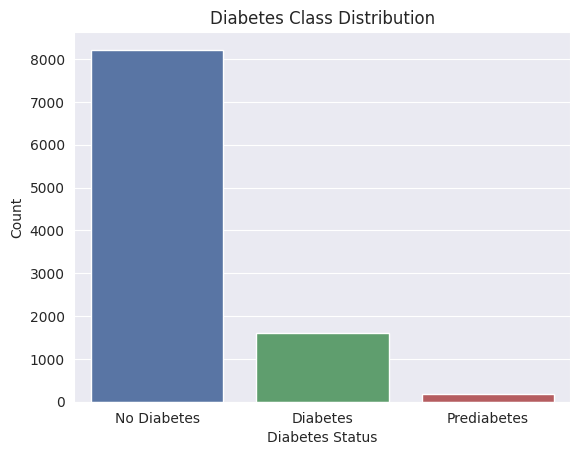

In [121]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0.0: 'No Diabetes', 1.0: 'Prediabetes', 2.0: 'Diabetes'}
new_data['dhi_label'] = new_data['Diabetes'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='dhi_label')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.title('Diabetes Class Distribution')
plt.show()

### **Standardizing**

In [122]:
data_x = data.drop(["Diabetes"], axis=1)
data_y = data['Diabetes']

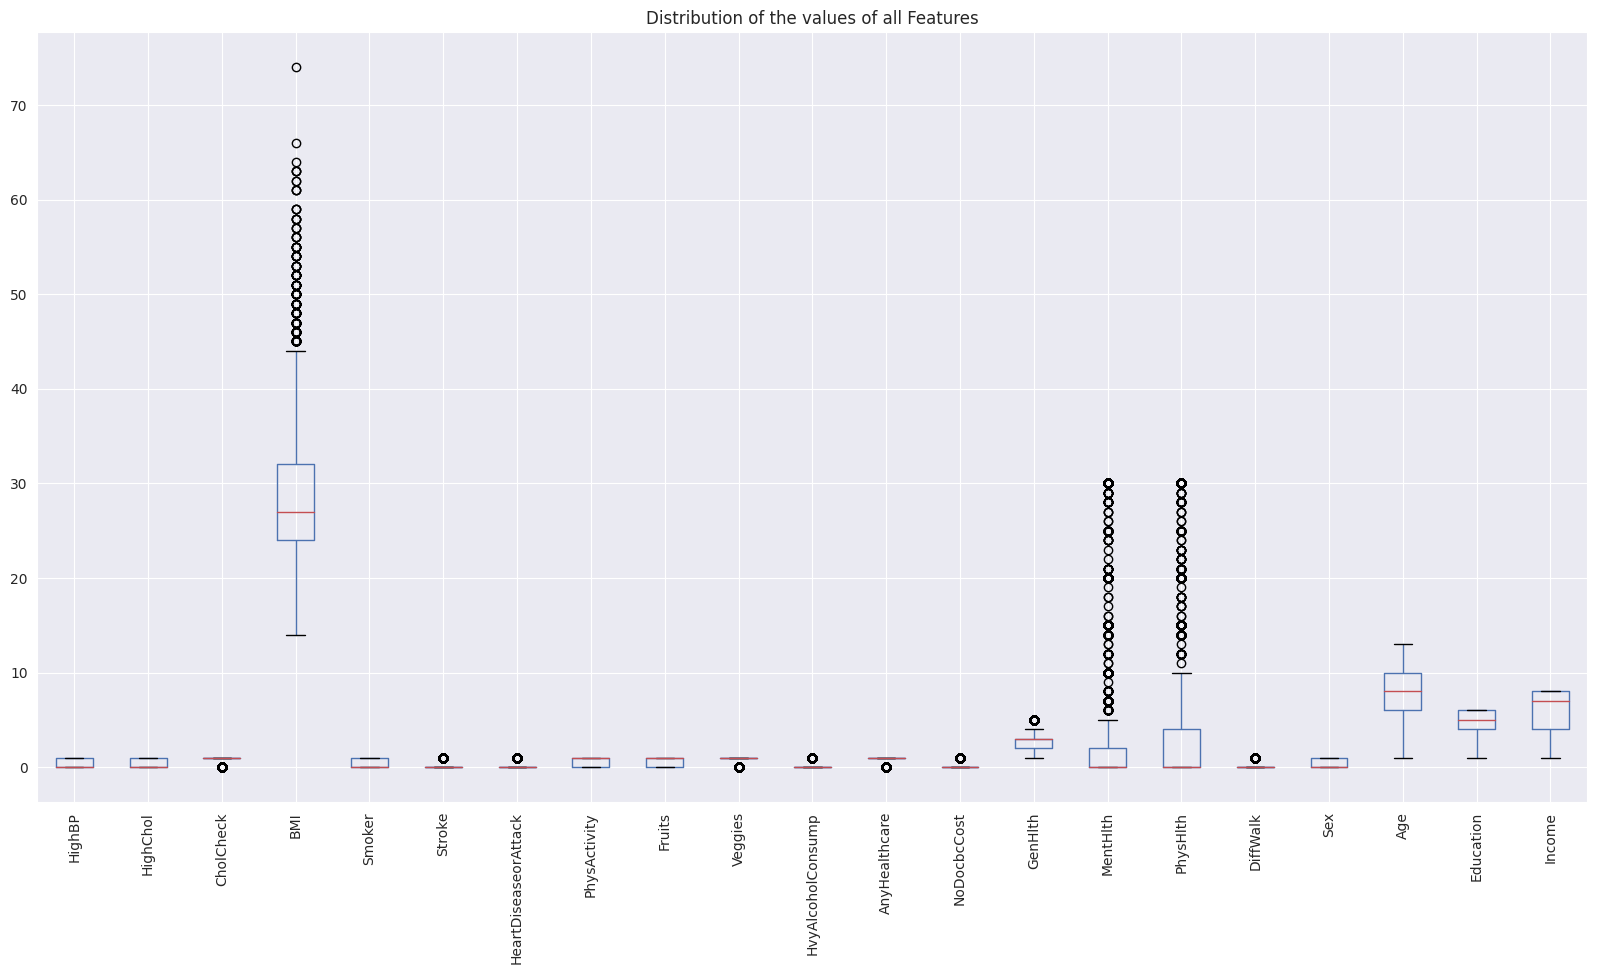

In [123]:
plt.figure(figsize=(20,10))
data_x.boxplot()
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all Features")
plt.show()

**Standardize the feature columns**

In [124]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(data_x)

# Convert the standardized features back to a DataFrame
std_data = pd.DataFrame(standardized_features, columns=data_x.columns)

In [125]:
std_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.078036,1.106883,0.200913,1.804549,1.102643,-0.221828,-0.335182,-1.701646,-1.235011,0.494682,...,0.253317,-0.346514,2.174080,1.844705,1.113405,2.027924,-0.846952,0.295347,-1.012157,-1.372912
1,-0.927613,-0.903438,-4.977268,-0.564994,1.102643,-0.221828,-0.335182,0.587666,-1.235011,-2.021502,...,-3.947626,2.885890,0.362875,-0.450228,-0.519345,-0.493115,-0.846952,-0.372028,0.999484,-2.313455
2,1.078036,1.106883,0.200913,-0.091085,-0.906912,-0.221828,-0.335182,-1.701646,0.809709,-2.021502,...,0.253317,2.885890,2.174080,3.374660,2.746156,2.027924,-0.846952,0.295347,-1.012157,0.978448
3,1.078036,-0.903438,0.200913,-0.249055,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,0.253317,-0.346514,-0.542728,-0.450228,-0.519345,-0.493115,-0.846952,0.962722,-2.017977,0.037904
4,1.078036,1.106883,0.200913,-0.722963,-0.906912,-0.221828,-0.335182,0.587666,0.809709,0.494682,...,0.253317,-0.346514,-0.542728,-0.067739,-0.519345,-0.493115,-0.846952,0.962722,-0.006337,-0.902640


**Marge the data back**

In [126]:
# Concatenate the standardized features with the target column
std_df = pd.concat([std_data, data_y], axis=1)

In [127]:
std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                10000 non-null  float64
 1   HighChol              10000 non-null  float64
 2   CholCheck             10000 non-null  float64
 3   BMI                   10000 non-null  float64
 4   Smoker                10000 non-null  float64
 5   Stroke                10000 non-null  float64
 6   HeartDiseaseorAttack  10000 non-null  float64
 7   PhysActivity          10000 non-null  float64
 8   Fruits                10000 non-null  float64
 9   Veggies               10000 non-null  float64
 10  HvyAlcoholConsump     10000 non-null  float64
 11  AnyHealthcare         10000 non-null  float64
 12  NoDocbcCost           10000 non-null  float64
 13  GenHlth               10000 non-null  float64
 14  MentHlth              10000 non-null  float64
 15  PhysHlth            

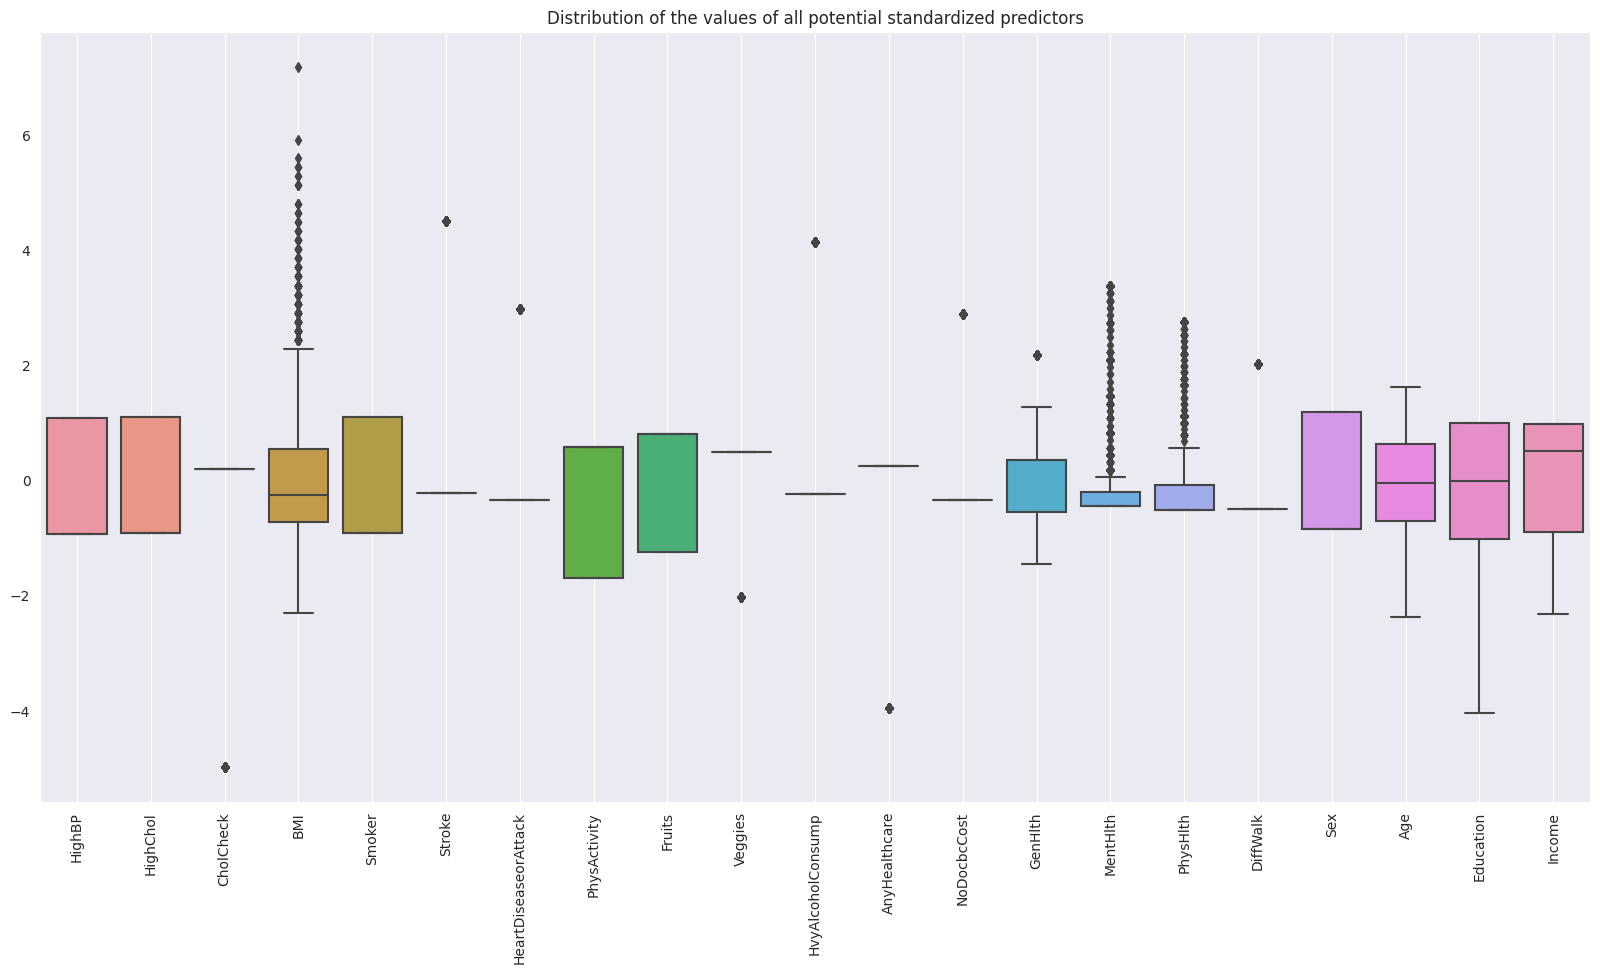

In [128]:
plt.figure(figsize=(20,10))
sea.boxplot(data=std_df.iloc[:,:-1]) # except the target
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

###**Correlation**

Text(0.5, 1.0, 'Correlation Heatmap')

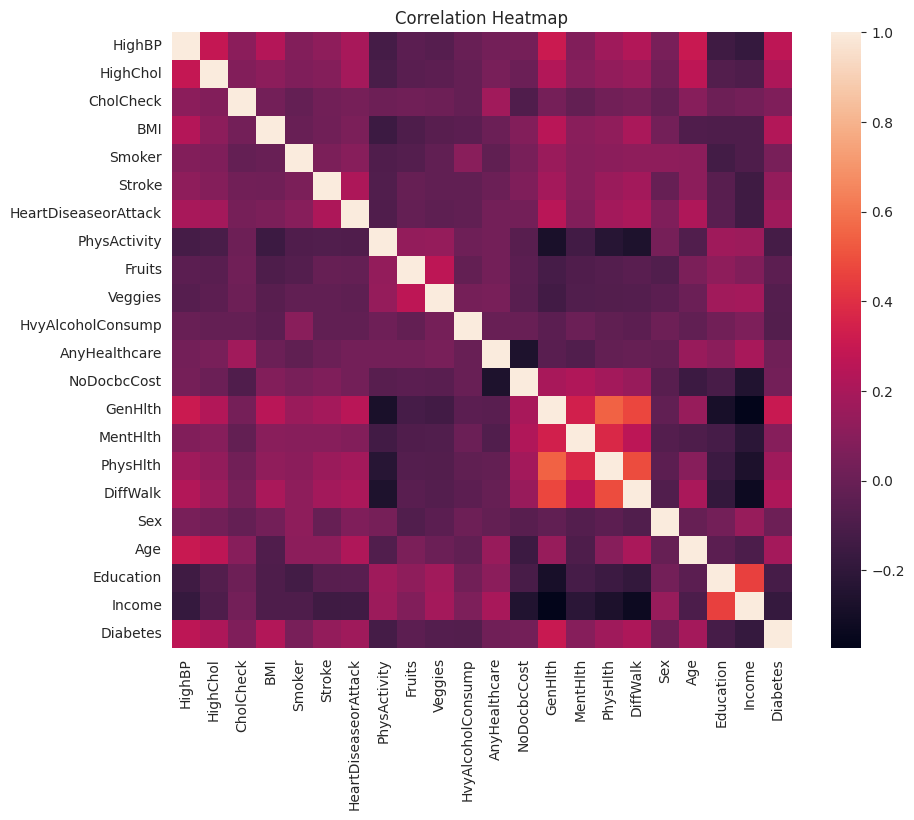

In [129]:
# Calculate the correlation matrix
correlation_matrix = std_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False).set_title('Correlation Heatmap')

### **Dimensionality Reduction**

**Split Dataset**

In [130]:
X = std_df.drop(["Diabetes"], axis=1)
y = std_df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
print(X_train.shape)

(8000, 21)


In [132]:
print(X_test.shape)

(2000, 21)


### **Define Classifiers**

In [133]:
# Define a list of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

classifiers_pca = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

classifiers_lda = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(),
}

### **Baseline model**

In [134]:
# Dictionary to store evaluation metrics
results = {}

# Loop through each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')

    # Store the results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Balanced Accuracy": balanced_accuracy,
        "Confusion Matrix": confusion,
    }

# Display the results
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

--- Logistic Regression ---
Accuracy: 0.82
Precision: 0.79
Recall: 0.82
F1 Score: 0.79
ROC AUC: 0.77
Balanced Accuracy: 0.39
Confusion Matrix:
[[1587    0   63]
 [  38    0    6]
 [ 246    0   60]]


--- Random Forest ---
Accuracy: 0.83
Precision: 0.77
Recall: 0.83
F1 Score: 0.78
ROC AUC: 0.71
Balanced Accuracy: 0.38
Confusion Matrix:
[[1600    0   50]
 [  38    0    6]
 [ 254    1   51]]


--- K-Nearest Neighbors ---
Accuracy: 0.81
Precision: 0.78
Recall: 0.81
F1 Score: 0.78
ROC AUC: 0.62
Balanced Accuracy: 0.39
Confusion Matrix:
[[1556    0   94]
 [  40    0    4]
 [ 240    0   66]]


--- XGBoost ---
Accuracy: 0.82
Precision: 0.79
Recall: 0.82
F1 Score: 0.79
ROC AUC: 0.72
Balanced Accuracy: 0.40
Confusion Matrix:
[[1570    0   80]
 [  35    0    9]
 [ 234    0   72]]




### **Hyper-Parameter Tuning**

In [135]:
# Define the hyperparameter grids for each classifier
param_grid = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10, 100],
        "penalty": ['l1', 'l2', 'elasticnet'],
        "solver": ['liblinear', 'saga']
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200, 300],
        "max_depth": [None, 10, 20, 30],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 10],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    "XGBoost": {
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [100, 200, 300],
        "max_depth": [3, 5, 7],
        "subsample": [0.8, 0.9, 1.0]
    }
}

In [136]:
best_params = {}

# Loop through classifiers and perform hyperparameter tuning
for name, classifier  in classifiers.items():
  if name in param_grid:
    # Create RandomizedSearchCV instance
    clf = RandomizedSearchCV(
        estimator=classifier,
        param_distributions=param_grid[name],
        n_iter=10,  # Number of parameter settings that are sampled
        scoring='accuracy',  # Use accuracy as the evaluation metric
        cv=5,  # Cross-validation folds
        verbose=1,  # Print progress
        n_jobs=-1  # Use all available CPU cores
    )

    # Fit the classifier
    clf.fit(X_train, y_train)

    best_params[name] = clf.best_params_

# Print the best parameters for each classifier
for name, params in best_params.items():
    print(f"Best parameters for {name}: {params}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'solver': 'saga', 'penalty': 'l2', 'C': 0.01}
Best parameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10}
Best parameters for K-Nearest Neighbors: {'weights': 'uniform', 'n_neighbors': 10, 'metric': 'euclidean'}
Best parameters for XGBoost: {'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01}


### **Principal Component Analysis (PCA)**

*Determining the number of principal components **(n_components)** for Principal Component Analysis (PCA) is an important step in dimensionality reduction. The goal is to find a suitable number of components that capture the majority of the data's variance while reducing its dimensionality.*



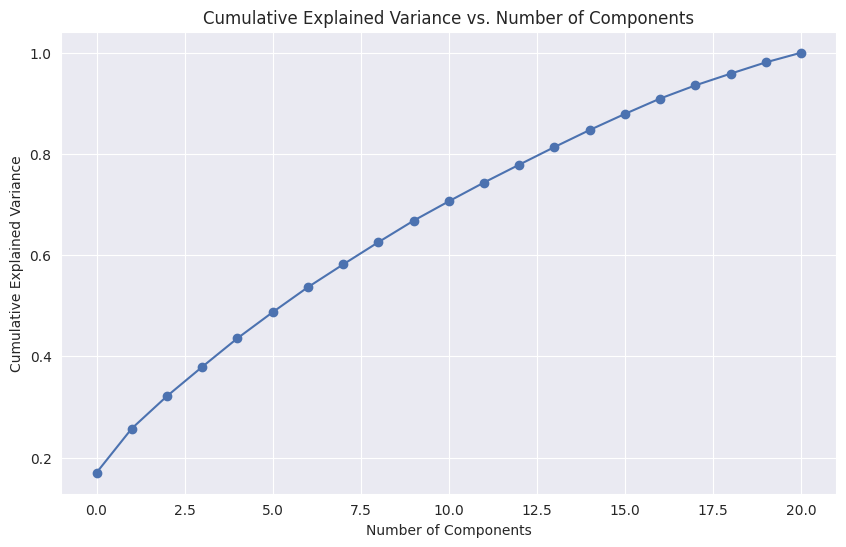

In [137]:
pca = PCA()
X_pca = pca.fit_transform(X)


explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

*In the plot, you'll see how much variance is explained by each additional component. You can choose the number of components that retain the desired percentage of total variance. For example, if you want to retain 95% of the variance, find the point on the x-axis where the cumulative explained variance is close to 0.95.*

In [138]:
# base on the graph
best_n_components = 19

In [139]:
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)

# Create a list of column names for the factors DataFrame
column_names = ['PC' + str(i + 1) for i in range(best_n_components)]

# Create the DataFrame
factors_Df = pd.DataFrame(data=X_train_pca, columns=column_names)
factors_Df.index = X_train.index

In [140]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
9254,2.155549,-1.757199,-0.344991,0.750474,2.031543,-1.267371,1.720105,0.803804,-1.195080,-0.356974,-0.260242,-1.923044,-1.046297,-1.235783,-1.251089,0.133510,1.368567,0.923867,-1.254383
1561,0.411613,-1.101248,0.268787,-0.154156,-1.512952,-0.176856,0.305370,0.753247,1.081748,-1.454129,0.542227,-0.754243,-0.805570,0.507868,1.435721,0.058314,-1.045272,-0.762401,-1.791365
1670,1.900045,-1.048882,0.581442,-0.110494,-0.345757,-0.759764,-1.162117,0.650804,-1.454259,-0.032183,-0.982099,-0.003382,0.324870,0.185240,0.141451,-0.203695,-0.582893,0.710933,-1.811708
6087,-1.623167,1.375895,-0.976505,-1.161637,0.234618,0.337029,0.601681,-1.147330,-0.357908,0.892409,0.650196,0.182399,0.806010,-0.128954,-1.365190,-0.187503,0.016774,0.177245,-0.536378
6669,-1.268199,-0.672710,-1.262643,-0.083825,1.482582,-0.097123,0.230831,-0.243309,-0.149125,-0.784447,-0.772227,0.828571,-0.082277,0.188217,-0.988099,0.037251,-0.919224,-0.240912,0.264472


In [141]:
print(pca.explained_variance_ratio_)
print()
print(pca.explained_variance_ratio_.cumsum())
print()
print(pca.explained_variance_ratio_.sum())

[0.17199505 0.08659916 0.06430368 0.05831649 0.05631576 0.05175055
 0.04864749 0.04456955 0.04358593 0.04198464 0.03833943 0.03682123
 0.03507863 0.03468954 0.03380378 0.03197934 0.03028819 0.02590037
 0.02325053]

[0.17199505 0.25859421 0.32289789 0.38121438 0.43753014 0.48928069
 0.53792818 0.58249774 0.62608367 0.66806831 0.70640774 0.74322897
 0.7783076  0.81299715 0.84680092 0.87878026 0.90906845 0.93496882
 0.95821935]

0.9582193527566649


**Visualization of the explained variance**

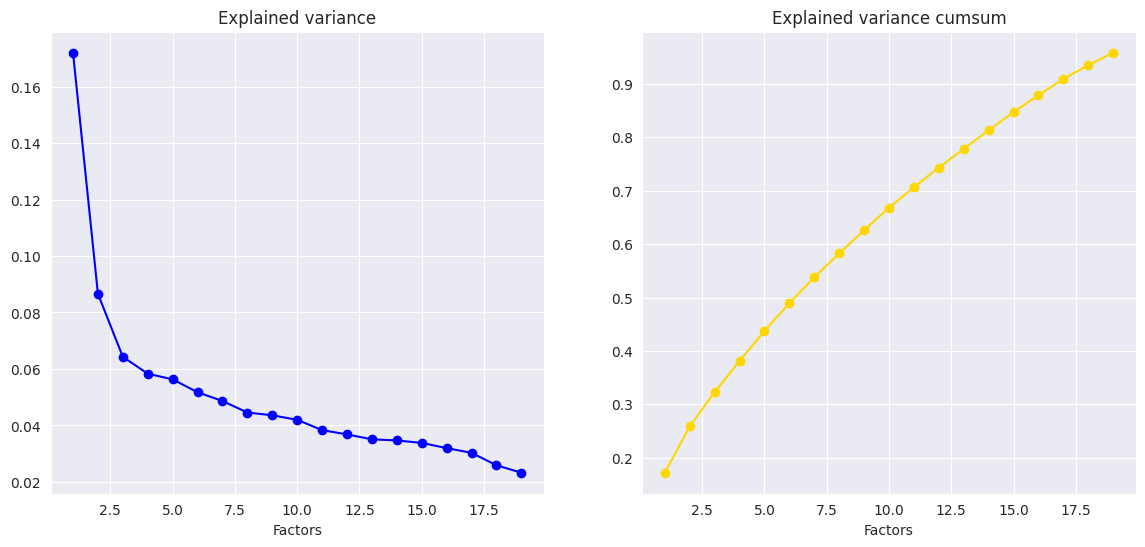

In [142]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.arange(1,20),pca.explained_variance_ratio_,color='b',marker='o')
ax2.plot(np.arange(1,20),np.cumsum(pca.explained_variance_ratio_),color='gold',marker='o')

ax1.set_xlabel('Factors')
ax1.set_title('Explained variance')
ax2.set_xlabel('Factors')
ax2.set_title('Explained variance cumsum')

plt.show()

### **Linear Discriminant Analysis (LDA)**

In [143]:
# Initialize LDA and transform X_train
lda = LinearDiscriminantAnalysis(n_components=None)
lda.fit(X_train, y_train)
X_train_lda = lda.transform(X_train)

# Initialize LDA and transform X_test
X_test_lda = lda.transform(X_test)

### **Predictive analysis**

#### **Principal Component Analysis (PCA)**

In [144]:
X_test_pca = pca.transform(X_test)

In [145]:
# Dictionary to store evaluation metrics and predictions
results = {}
pca_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_pca.items():
    best_param = best_params.get(name)  # Retrieve the best parameters

    if best_param:
      # Initialize the classifier with the best parameters
      clf = clf.set_params(**best_param)

      # Train the classifier
      clf.fit(X_train_pca, y_train)

      # Store the trained classifiers
      pca_trained_classifiers[name] = clf

      # Make predictions on the test set
      y_pred = clf.predict(X_test_pca)

      # Calculate evaluation metrics
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
      recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
      f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
      balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
      confusion = confusion_matrix(y_test, y_pred)

      # ROC AUC calculation for binary and multiclass classification
      if len(np.unique(y_train)) == 2:
          roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca)[:, 1])
      else:
          roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_pca), multi_class='ovr')

      # Store the results in the dictionary
      results[name] = {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1,
          "ROC AUC": roc_auc,
          "Balanced Accuracy": balanced_accuracy,
          "Confusion Matrix": confusion,
      }

# Display the results
print("Principal Component Analysis (PCA) \n")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

Principal Component Analysis (PCA) 

--- Logistic Regression ---
Accuracy: 0.82
Precision: 0.79
Recall: 0.82
F1 Score: 0.78
ROC AUC: 0.77
Balanced Accuracy: 0.38
Confusion Matrix:
[[1593    0   57]
 [  39    0    5]
 [ 255    0   51]]


--- Random Forest ---
Accuracy: 0.82
Precision: 0.77
Recall: 0.82
F1 Score: 0.76
ROC AUC: 0.74
Balanced Accuracy: 0.35
Confusion Matrix:
[[1627    0   23]
 [  40    0    4]
 [ 288    0   18]]


--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.79
Recall: 0.83
F1 Score: 0.78
ROC AUC: 0.65
Balanced Accuracy: 0.38
Confusion Matrix:
[[1601    0   49]
 [  41    0    3]
 [ 256    0   50]]


--- XGBoost ---
Accuracy: 0.82
Precision: 0.78
Recall: 0.82
F1 Score: 0.78
ROC AUC: 0.76
Balanced Accuracy: 0.37
Confusion Matrix:
[[1596    0   54]
 [  38    0    6]
 [ 259    0   47]]




#### **Linear Discriminant Analysis (LDA)**

In [146]:
# Initialize LDA and transform X_test
X_test_lda = lda.transform(X_test)

In [147]:
# Dictionary to store evaluation metrics and predictions
results = {}
lda_trained_classifiers= {}

# Loop through each classifier
for name, clf in classifiers_lda.items():
    best_param = best_params.get(name)  # Retrieve the best parameters

    if best_param:
      # Initialize the classifier with the best parameters
      clf = clf.set_params(**best_param)
      # Train the classifier
      clf.fit(X_train_lda, y_train)

      # Store the trained classifiers
      lda_trained_classifiers[name] = clf

      # Make predictions on the test set
      y_pred = clf.predict(X_test_lda)

      # Calculate evaluation metrics
      accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average="weighted", zero_division=1)
      recall = recall_score(y_test, y_pred, average="weighted", zero_division=1)
      f1 = f1_score(y_test, y_pred, average="weighted", zero_division=1)
      balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
      confusion = confusion_matrix(y_test, y_pred)

      # ROC AUC calculation for binary and multiclass classification
      if len(np.unique(y_train)) == 2:
          roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda)[:, 1])
      else:
          roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test_lda), multi_class='ovr')

      # Store the results in the dictionary
      results[name] = {
          "Accuracy": accuracy,
          "Precision": precision,
          "Recall": recall,
          "F1 Score": f1,
          "ROC AUC": roc_auc,
          "Balanced Accuracy": balanced_accuracy,
          "Confusion Matrix": confusion,
      }


# Display the results
print("Linear Discriminant Analysis (LDA) \n")
for name, metrics in results.items():
    print(f"--- {name} ---")
    print("Accuracy: {:.2f}".format(metrics["Accuracy"]))
    print("Precision: {:.2f}".format(metrics["Precision"]))
    print("Recall: {:.2f}".format(metrics["Recall"]))
    print("F1 Score: {:.2f}".format(metrics["F1 Score"]))
    print("ROC AUC: {:.2f}".format(metrics["ROC AUC"]))
    print("Balanced Accuracy: {:.2f}".format(metrics["Balanced Accuracy"]))
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("\n")

Linear Discriminant Analysis (LDA) 

--- Logistic Regression ---
Accuracy: 0.83
Precision: 0.80
Recall: 0.83
F1 Score: 0.79
ROC AUC: 0.77
Balanced Accuracy: 0.39
Confusion Matrix:
[[1597    0   53]
 [  39    0    5]
 [ 246    0   60]]


--- Random Forest ---
Accuracy: 0.83
Precision: 0.80
Recall: 0.83
F1 Score: 0.79
ROC AUC: 0.76
Balanced Accuracy: 0.39
Confusion Matrix:
[[1599    0   51]
 [  37    0    7]
 [ 248    0   58]]


--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.79
Recall: 0.83
F1 Score: 0.79
ROC AUC: 0.67
Balanced Accuracy: 0.38
Confusion Matrix:
[[1593    0   57]
 [  38    0    6]
 [ 248    0   58]]


--- XGBoost ---
Accuracy: 0.82
Precision: 0.79
Recall: 0.82
F1 Score: 0.78
ROC AUC: 0.76
Balanced Accuracy: 0.38
Confusion Matrix:
[[1592    0   58]
 [  38    0    6]
 [ 252    0   54]]




### **Ensemble of Classifiers with Dimensionality Reduction**

#### **1. Choose One Dimensionality Reduction Technique**

##### **2.1 PCA**

###### **Bagging**

In [148]:
# Create a list of base classifiers
base_classifiers = [pca_trained_classifiers['Logistic Regression'], pca_trained_classifiers['Random Forest'], pca_trained_classifiers['K-Nearest Neighbors'] , pca_trained_classifiers['XGBoost'] ]

In [149]:
# Create a list of bagging classifiers, each using a different base classifier
bagging_classifiers = []
n_estimators = 3  # Number of base estimators

for classifier in base_classifiers:
    bagging_model = BaggingClassifier(estimator=classifier, n_estimators=n_estimators)
    bagging_classifiers.append(bagging_model)

# Train the ensemble.
for bagging_model in bagging_classifiers:
    bagging_model.fit(X_train_pca, y_train)

In [150]:
# Predict using the ensemble classifier
begging_pred  = bagging_model.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, begging_pred )
precision = precision_score(y_test, begging_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, begging_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, begging_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, begging_pred )
confusion = confusion_matrix(y_test, begging_pred )


print(f"--- LDA Bagging Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Bagging Ensemble with Dimensionality Reduction ---
Accuracy: 0.83
Precision: 0.79
Recall: 0.83
F1 Score: 0.78
Balanced Accuracy: 0.37
Confusion Matrix:
[[1611    0   39]
 [  37    0    7]
 [ 262    0   44]]




###### **Boosting**

In [151]:
base_classifiers = [pca_trained_classifiers['Logistic Regression'], pca_trained_classifiers['Random Forest'], pca_trained_classifiers['XGBoost'] ]

In [152]:
# Create a list of boosting classifiers, each using a different base classifier
boosting_classifiers = []
n_estimators = 3  # Number of boosting iterations

for classifier in base_classifiers:
    boosting_model = AdaBoostClassifier(estimator=classifier, n_estimators=n_estimators)
    boosting_classifiers.append(boosting_model)

# Train the ensemble
for boosting_model in boosting_classifiers:
    boosting_model.fit(X_train_pca, y_train)

In [153]:
# Predict using the ensemble classifier
boosting_pred  = boosting_model.predict(X_test_pca)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, boosting_pred )
precision = precision_score(y_test, boosting_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, boosting_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, boosting_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, boosting_pred )
confusion = confusion_matrix(y_test, boosting_pred )


print(f"--- LDA Boosting Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Boosting Ensemble with Dimensionality Reduction ---
Accuracy: 0.82
Precision: 0.86
Recall: 0.82
F1 Score: 0.75
Balanced Accuracy: 0.33
Confusion Matrix:
[[1650    0    0]
 [  44    0    0]
 [ 306    0    0]]




##### **2.2 LDA**

In [154]:
# Create a list of base classifiers
base_classifiers = [lda_trained_classifiers['Logistic Regression'], lda_trained_classifiers['Random Forest'], lda_trained_classifiers['K-Nearest Neighbors'] , lda_trained_classifiers['XGBoost'] ]

###### **Bagging**

In [155]:
# Create a list of bagging classifiers, each using a different base classifier
bagging_classifiers = []
n_estimators = 4  # Number of base estimators

for classifier in base_classifiers:
    bagging_model = BaggingClassifier(estimator=classifier, n_estimators=n_estimators)
    bagging_classifiers.append(bagging_model)

# Train the ensemble
for bagging_model in bagging_classifiers:
    bagging_model.fit(X_train_lda, y_train)

In [156]:
# Predict using the ensemble classifier
begging_pred  = bagging_model.predict(X_test_lda)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, begging_pred )
precision = precision_score(y_test, begging_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, begging_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, begging_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, begging_pred )
confusion = confusion_matrix(y_test, begging_pred )

print(f"--- LDA Bagging Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Bagging Ensemble with Dimensionality Reduction ---
Accuracy: 0.83
Precision: 0.79
Recall: 0.83
F1 Score: 0.78
Balanced Accuracy: 0.38
Confusion Matrix:
[[1600    0   50]
 [  39    0    5]
 [ 254    0   52]]




###### **Boosting**

In [157]:
base_classifiers = [lda_trained_classifiers['Logistic Regression'], lda_trained_classifiers['Random Forest'], lda_trained_classifiers['XGBoost'] ]

In [158]:
# Create a list of boosting classifiers, each using a different base classifier
boosting_classifiers = []
n_estimators = 3  # Number of boosting iterations

for classifier in base_classifiers:
    boosting_model = AdaBoostClassifier(estimator=classifier, n_estimators=n_estimators)
    boosting_classifiers.append(boosting_model)

# Train the ensemble
for boosting_model in boosting_classifiers:
    boosting_model.fit(X_train_lda, y_train)

In [159]:
# Predict using the ensemble classifier
boosting_pred  = boosting_model.predict(X_test_lda)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, boosting_pred )
precision = precision_score(y_test, boosting_pred , average="weighted", zero_division=1)
recall = recall_score(y_test, boosting_pred , average="weighted", zero_division=1)
f1 = f1_score(y_test, boosting_pred , average="weighted", zero_division=1)
balanced_accuracy = balanced_accuracy_score(y_test, boosting_pred )
confusion = confusion_matrix(y_test, boosting_pred )

print(f"--- LDA Boosting Ensemble with Dimensionality Reduction ---")
print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))
print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
print("Confusion Matrix:")
print(confusion)
print("\n")

--- LDA Boosting Ensemble with Dimensionality Reduction ---
Accuracy: 0.82
Precision: 0.86
Recall: 0.82
F1 Score: 0.75
Balanced Accuracy: 0.33
Confusion Matrix:
[[1650    0    0]
 [  44    0    0]
 [ 306    0    0]]


